In [1]:
# importing other ppl's code
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

# importing my own code
from lib.diffeq import crank_nicolson_solve

# Theory

We have been told to solve the diffusion equation for the magnetic field in cylindrical coordinates. The equation is given by

$$\frac{\partial \mathbf{B}}{\partial t} = \nabla \times (\mathbf{V} \times \mathbf{B}) + \eta_T \nabla^2 \mathbf{B} + ...$$

where $\mathbf{B}$ is the magnetic field, $\eta_T$ is the magnetic diffusivity, and $\mathbf{V}$ is the velocity field. The first term on the right-hand side is the diffusion term, and the second term is the advection term.

Now, we have been instructed to ignore the $\nabla \times (\mathbf{V} \times \mathbf{B})$ term, and the other terms. Thus the equation becomes:

$$\frac{\partial \mathbf{B}}{\partial t} = \eta_T \nabla^2 \mathbf{B}$$

Expanding the Laplacian in cylindrical coordinates, we get:

$$\frac{\partial \mathbf{B}}{\partial t} = \eta_T \left( \frac{\partial^2 \mathbf{B}}{\partial r^2} + \frac{1}{r} \frac{\partial \mathbf{B}}{\partial r} + \frac{\partial^2 \mathbf{B}}{\partial z^2} \right)$$

Now, I have been instructed to solve this equation assuming that the magnetic field is constant along the $r$ direction, and that it is a function of $z$ only. Thus for me, the differential equation to solve becomes:

$$\frac{\partial B}{\partial t} = \eta_T \frac{\partial^2 B}{\partial z^2}$$

This differential equation turns out to be an elliptic partial differential equation, and solving it is well explored in literature. We will use the crank-nicolson method (popularly used to solve heat equations) to solve this equation. The crank-nicolson method is a finite difference method, and it is **unconditionally stable**. Although that doesn't mean that it is accurate, it is a good starting point for solving partial differential equations.

# Defining some utility functions and some constants

In [2]:
# simulation parameters
L = 8     # total z axis length - in some units
T = 1     # time length - in some units
Nl = 200  # number of spatial steps
Nt = 500  # number of time steps

# spatial and time grids definition
x = np.linspace(0, L, Nl + 1)
time = np.linspace(0, T, Nt + 1)

def make_gif(x, us, name, labels, skip_frame = 1, till=None, fps=25):
    us = us[:, :till:skip_frame, :] if till is not None else us[:, ::skip_frame, :]
    max_B = np.max(us)
    min_B = np.min(us)

    p = tqdm(total=us.shape[1]+1)

    fig, ax = plt.subplots()
    def update(frame):
        p.update(1)
        ax.clear()
        colours = [
            'tab:blue',
            'tab:green',
            'tab:orange',
        ]
        
        if len(us) == 1:  # a dashed red half-transparent line
            ax.plot(x, us[0, 0], "r--", label="Initial Condition", alpha=0.4)
        # ax.plot(x, us[0, frame], label=labels[0])
        # ax.plot(x, us[1, frame], label=labels[1])
        for i in range(us.shape[0]):
            ax.plot(x, us[i, frame], colours[i], label=labels[i])
        plt.ylim(min_B, max_B)
        ax.set_title(f"Magnetic Field Strength vs z Distance at Time Step {frame*skip_frame}")
        ax.set_xlabel('Distance (z)')
        ax.set_ylabel('Magnetic Field Strength (B)')
        ax.legend(loc='lower right')
        ax.grid()

    animation = FuncAnimation(fig, update, frames=us.shape[1], interval=int(1000/fps), repeat=False)
    animation.save(f"outputs/asgt1/{name}", writer='imagemagick')
    p.close()

# Solutions Demonstration

The values of the parameters of simulation are chosen so that the solution is easy to visualize. I have not chosen the values to be realistic, but the code can be easily modified to simulate realistic values. I have not grounded their values in any physical theory, and I have not used any physical constants. Also I have made sure I use "unit" as unit for all the quantities, so that the code can be easily modified to use realistic values.

In [3]:
# u01 = 2*np.cos(13*math.pi*x/L)
# u02 = 5*np.cos(31*math.pi*x/L)
# u03 = u01 + u02
# u1 = crank_nicolson_solve(u01, L, T, Nl, Nt, eta=0.15)
# u2 = crank_nicolson_solve(u02, L, T, Nl, Nt, eta=0.15)
# u3 = crank_nicolson_solve(u03, L, T, Nl, Nt, eta=0.15)
# labels = [
#     "$u_1 = 2\cos(13\pi x/L)$",
#     "$u_2 = 5\cos(31\pi x/L)$",
#     "$u_3 = 2\cos(13\pi x/L) + 5\cos(31\pi x/L)$",
# ]
# make_gif(x, np.array([u1, u2, u3]), "demo1.gif", labels, skip_frame=4, fps=20)

Showing how the high frequencies even out much faster than the low frequencies.

Here we have used 3 initial conditions and compared them:

$$u_1 = 2\cos(13\pi x/L)$$
$$u_2 = 5\cos(31\pi x/L)$$
$$u_3 = u_1 + u_2$$

Here we have 2 frequencies, 13 and 31. We will see that the high frequency (31) will even out much faster than the low frequency (13). These two frequencies have been chosen such that they do not have a common multiple in the range; yet placed very far apart from each other.

We also notice that $u_3$ soon becomes close to $u_1$, when the high frequency has evened out. **This tells us that all the diferent frequncies even out independently.**

![](outputs/asgt1/demo1.gif)

In [4]:
# u0 = 16*np.sin(math.pi*x/L) + 2*np.cos(13*math.pi*x/L)

# u = crank_nicolson_solve(u0, 8, T, Nl, Nt, eta=0.7)
# labels = [
#     "$u = 16\cos(\pi x/L) + 2\cos(13\pi x/L)$",
# ]
# # make_gif(x, np.array([u,]), "demo1.gif", labels, skip_frame=1, till=200, fps=24)
# make_gif(x, np.array([u,]), "demo2.gif", labels, skip_frame=10, fps=24)

This is another similar simulation with a single initial condition.
<!-- x*L - x**2 + 5*np.cos(13*math.pi*x/L) -->
$$u = 16\cos(\pi x/L) + 2\cos(13\pi x/L)$$

Here also we observe similar resuls.

![](outputs/asgt1/demo2.gif)

Next let us consider the initial condition where we have a single low frequency feature:

$$u = e^c\sin(\pi x/L)$$

This is a simple sin curve. We will need to increase the decay rate to see the decrease in this low frequency freature. Then we will take the middle point in the length (z) where the amplitude is maximum. Finally we would plot a graph of the evolution of the amplitude of the magnetic field at that point. We expect to see an exponential decay. Finally we would try to plot it on a log scale.

The analytical solution of the differential equation is of the form:

$$u(x, t) = e^c \sin(\pi x/L) e^{\frac{-\pi^2 \eta_T}{L^2} t}$$

now, converting this to log scale, we get:

$$\log(u(x, t)) = \log(\sin(\pi x/L)) - \frac{\pi^2 \eta_T}{L^2} t$$

Now, here we are taking the x to be constant, hence the first term becomes constant. Moreover, at time t=0, $u(x, 0) = e^c \sin(\pi x/L)$. So, at the midpoint, $\sin(\pi x/L) = e^c$. Hence the equation becomes:

$$\log(u(x, t)) = c - \frac{\pi^2 \eta_T}{L^2} t$$

now, if we set $L = \pi$, then the slope of the line becomes $-\eta_T$. Hence, the slope of the line in the log scale plot should be $-\eta_T$.


alpha = 1.4328979206268908
expected slope = -2.0000
calculated slope = -2.8282


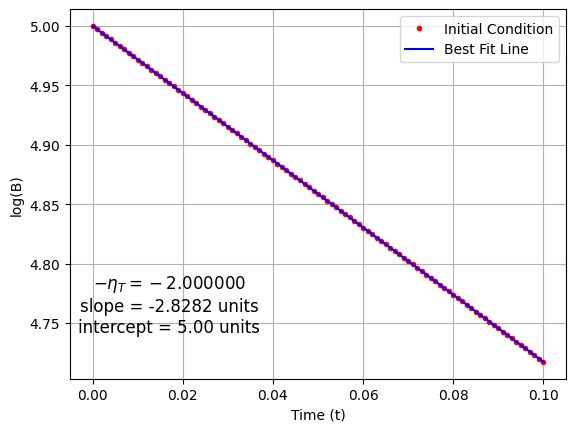

In [7]:
# simulation parameters
L = np.pi     # total z axis length - in some units
T = 0.1     # time length - in some units
Nl = 100  # number of spatial steps
Nt = 100  # number of time steps
eta = 2
n = 1
c = 5

# spatial and time grids definition
x = np.linspace(0, L, Nl + 1)
time = np.linspace(0, T, Nt + 1)

u0 = (np.e**c)*np.sin(n*math.pi*x/L)

u = crank_nicolson_solve(u0, L, T, Nl, Nt, eta=eta)
print(f"expected slope = {-((math.pi*n)**2)*eta/L**2:.4f}")
# print(f"expected slope = {-eta/L**2}")

x_ = time
y_ = np.log(u[:, 50])
m, c = np.polyfit(x_, y_, 1)  # m is the slope and c is the y-intercept
print(f"calculated slope = {m:.4f}")
plt.plot(x_, y_, "r.", label="Initial Condition")
plt.plot(x_, m*x_ + c, "b-", label="Best Fit Line")
plt.xlabel("Time (t)")
plt.ylabel("log(B)")
plt.text(0.2, 0.2, f"$-\eta_T = {-eta:2f}$\nslope = {m:.4f} units\nintercept = {c:.2f} units", fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.legend()
plt.grid()
plt.savefig("outputs/asgt1/demo3.png")

![](outputs/asgt1/demo3.png)

So, we can clearly see that the slope of the line is very close to $-\eta_T$ as expected. Also, the intercept of the line is $c$, where $e^c$ is the initial amplitude of the magnetic field at the midpoint. Hence, we can see that the simulation is working as expected.